 #         <h1 align="center">   **OpenVaccine || EDA || Feature Engineering**</h1>
 
![](http://https://daslab.stanford.edu/site_data/news_img/openvaccine_lores.png)

# **Importing Libraries**

In [1]:
!pip install forgi

     |████████████████████████████████| 26.6 MB 27.2 MB/s 
  Created wheel for forgi: filename=forgi-2.0.2-cp37-cp37m-linux_x86_64.whl size=27430246 sha256=2cc78efce2721f0895dc5044804058d49e36ad934602374e1646b0ac2c958a06
  Stored in directory: /root/.cache/pip/wheels/ce/5d/b2/aa4d2d9454b124485448d838d5d02bce20f5546aa9b9d40b55
Successfully built forgi


In [2]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import forgi.graph.bulge_graph as fgb
import forgi.visual.mplotlib as fvm

import plotly.express as px
from collections import Counter as count
from collections import Counter

# **Reading Data**

In [3]:
train = pd.read_json('../input/stanford-covid-vaccine/train.json', lines = True).drop('index' , axis = 1)
test = pd.read_json('../input/stanford-covid-vaccine/test.json' , lines = True).drop('index' , axis = 1)
sub = pd.read_csv('../input/stanford-covid-vaccine/sample_submission.csv')

In [4]:
train.head()

,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [5]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
id,id_001f94081,id_0049f53ba,id_006f36f57,id_0082d463b,id_0087940f4,id_00ab2d761,id_00abef1d7,id_00b436dec,id_00fcc5cd1,id_010ab0472,...,id_fe899d33d,id_febf3bab9,id_feea15e66,id_ff103a85c,id_ff13729b0,id_ff84602f7,id_ff85fcdba,id_ffa99f541,id_ffe06f3fe,id_fff546103
sequence,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,GGAAAGCGCCGCGGCGGUAGCGGCAGCGAGGAGCGCUACCAAGGCA...,GGAAAACAAUUGCAUCGUUAGUACGACUCCACAGCGUAAGCUGUGG...,GGAAAUCAUCGAGGACGGGUCCGUUCAGCACGCGAAAGCGUCGUGA...,GGAAAGCCAUACCUAGGCGCAAGCCUAGGUAUGGCGGUGAUCUGGU...,GGAAAGCAUGGGACCACGAUUCACAUCGGUCUGCACGUAGGACAUU...,...,GGAAAAGUAGGCAACUCGAAGUACGCUCCUGGAACAGAAAAAGAGA...,GGAAAAAGAUCACAGAGGUGAUCAAGAAGUGUAUCAGAGGAUACAC...,GGAAACUCCACAUCUCUACGCCACGAAAGUGGGUAGGAUGGGAGAG...,GGAAAAGAUCGAUAGGUACGUGGGUUCAUGUAGGAAACUAGCUGGC...,GGAAAUAAAUAAAUAACAAUAAAGAGAUAAGACACAAUAAAUAAAA...,GGAAAAUAGCAGAGGAAAUACUAGAGCAAUUGCAAAGGCCGAUCAU...,GGAAAACAAAAACAAACAACAAAAACAAACAACAAAAACAAACAAC...,GGAAAGCCAUACCUAGGCUUCGGCCUAGGUAUGGCGGUGAUCUGGU...,GGAAACGAUAGCAGAAGAGAUCGAUAUAGAGCAUAAGCUAAGAAUA...,GGAAAGCUAGGACGUGGGAGCGUAGCUCUCCACACGGGUACGCCAA...
structure,.....((((((.......)))).)).((.....((..((((((......,.....(((((((((((((((((((((((....)))))))))).)))...,.....((((.((.....((((.(((.....)))..((((......)...,......((((((((((((((((......))))))))))))))))((...,.....(((((((.((((((((((((.(((((((((....)))))))...,.....(.(((((.(((((((((...........)))))))..(((....,.........((((((((......((((((((((((....)))))))...,.....(((((((((((..(((((((((..((((....))))..)))...,.....(((((((((((((....)))))))))))))(((((((((((...,.....(((...((((..(((....))))))))))(((((((((......,...,......((((((..(((...(((((((((((...))).....)))....,.......((((((....)))))).....(((((((....)))))))...,.....((((.((((.((((.((((....)))))))))))))))).(...,......((((....(((((((((((.((..(((....)))..))))...,.................................................,........((..((......))...)).........(((..........,.................................................,.....(((((((((((((....)))))))))))))(((((((((((...,.....((((..(....)..))))......(((....)))..........,.....((((((((((((((((...)))).)))).((((((((((.....
predicted_loop_type,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,EEEEESISSSSSISSSSSSSSSHHHHHHHHHHHSSSSSSSMMSSSH...,EEEEEEEEESSSSSSSSIIIIIISSSSSSSSSSSSHHHHSSSSSSS...,EEEEESSSSSSSSSSSIISSSSSSSSSIISSSSHHHHSSSSIISSS...,EEEEESSSSSSSSSSSSSHHHHSSSSSSSSSSSSSSSSSSSSSSSS...,EEEEESSSBBBSSSSBBSSSHHHHSSSSSSSSSSSSSSSSSSSIII...,...,EEEEEESSSSSSBBSSSIIISSSSSSSSSSSHHHSSSBBBBBSSSB...,EEEEEEESSSSSSHHHHSSSSSSXXXXXSSSSSSSHHHHSSSSSSS...,EEEEESSSSBSSSSBSSSSBSSSSHHHHSSSSSSSSSSSSSSSSMS...,EEEEEESSSSIIIISSSSSSSSSSSBSSIISSSHHHHSSSIISSSS...,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,EEEEEEEESSIISSHHHHHHSSIIISSXXXXXXXXXSSSHHHHHHH...,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,EEEEESSSSSSSSSSSSSHHHHSSSSSSSSSSSSSSSSSSSSSSSS...,EEEEESSSSIISHHHHSIISSSSXXXXXXSSSHHHHSSSXXXXXXX...,EEEEESSSSSSSSSSSSSSSSHHHSSSSBSSSSMSSSSSSSSSSHH...
signal_to_noise,6.894,0.193,8.8,0.104,0.423,4.136,2.485,1.727,0.646,5.545,...,3.653,6.064,3.331,4.017,1.995,4.036,3.227,0.345,5.553,6.545
SN_filter,1,0,1,0,0,1,1,1,0,1,...,0,1,1,1,0,1,1,0,0,1
seq_length,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
seq_scored,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
reactivity_error,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[0.0931, 0.13290000000000002, 0.11280000000000...","[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[1.665, 2.1728, 2.0

In [6]:
test.head()

,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


In [7]:
sub.head()

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.0,0.0,0.0,0.0,0.0
1,id_00073f8be_1,0.0,0.0,0.0,0.0,0.0
2,id_00073f8be_2,0.0,0.0,0.0,0.0,0.0
3,id_00073f8be_3,0.0,0.0,0.0,0.0,0.0
4,id_00073f8be_4,0.0,0.0,0.0,0.0,0.0


In [8]:
train.columns

Index(['id', 'sequence', 'structure', 'predicted_loop_type', 'signal_to_noise',
       'SN_filter', 'seq_length', 'seq_scored', 'reactivity_error',
       'deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C',
       'deg_error_50C', 'reactivity', 'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C',
       'deg_50C'],
      dtype='object')

In [9]:
test.columns

Index(['id', 'sequence', 'structure', 'predicted_loop_type', 'seq_length',
       'seq_scored'],
      dtype='object')

In [10]:
print("Train data shape: ",train.shape)
print("Test data shape: ",test.shape)
print("Sample submission shape: ",sub.shape)

Train data shape:  (2400, 18)
Test data shape:  (3634, 6)
Sample submission shape:  (457953, 6)


# **Starting EDA**

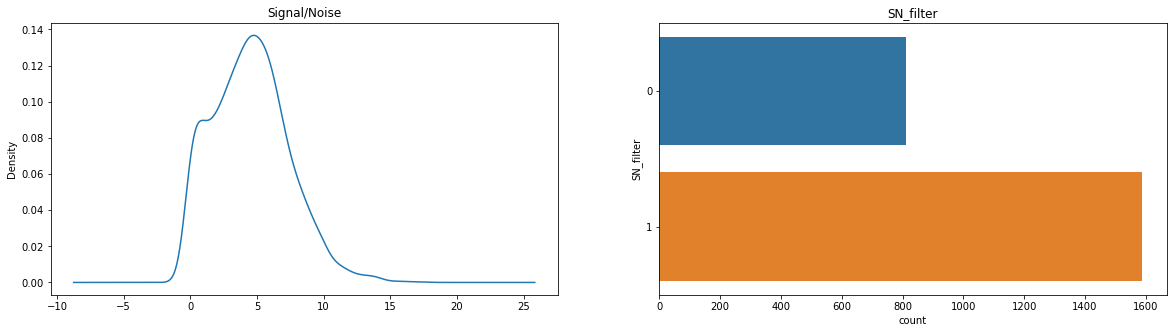

In [11]:
fig, ax = plt.subplots(1 , 2 , figsize = (20 , 5))
train['signal_to_noise'].plot.kde(ax = ax[0])
ax[0].set_title('Signal/Noise')

sns.countplot(data=train,y='SN_filter',ax=ax[1])
ax[1].set_title('SN_filter')

plt.show()

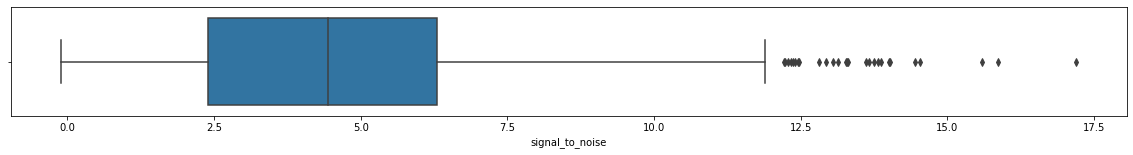

In [12]:
plt.figure(figsize = (20 , 2))
sns.boxplot(data = train , x = 'signal_to_noise')

plt.show()

In [13]:
print("Number of samples with -ev signal/noise values: " , train[train['signal_to_noise']<0].shape[0])

Q1 = np.percentile(train['signal_to_noise'] , q = 25)
Q3 = np.percentile(train['signal_to_noise'] , q = 75)
IQR = Q3 - Q1

print("Number of samples with too high signal/noise values", train[train['signal_to_noise'] > Q3 + 1.5 * IQR].shape[0])

Number of samples with -ev signal/noise values:  8
Number of samples with too high signal/noise values 27


In [14]:
train.seq_length.value_counts()

107    2400
Name: seq_length, dtype: int64

In [15]:
test.seq_length.value_counts()

130    3005
107     629
Name: seq_length, dtype: int64

In [16]:
fig = px.histogram(
    train, 
    "signal_to_noise", 
    nbins=25, 
    title='signal_to_noise column distribution', 
    width=800,
    height=500
)
fig.show()

In [17]:
ds = train['SN_filter'].value_counts().reset_index()
ds.columns = ['SN_filter', 'count']
fig = px.pie(
    ds, 
    values='count', 
    names="SN_filter", 
    title='SN_filter bar chart', 
    width=500, 
    height=500
)
fig.show()


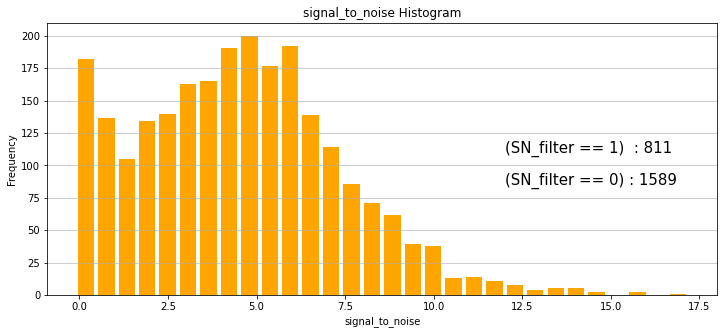

In [18]:
plt.figure(figsize = (12 , 5))
n, bins, patches = plt.hist(x = train['signal_to_noise'] , bins = 'auto' , color = '#FFA500' , alpha = 1 , rwidth = 0.80)
plt.grid(axis='y', alpha = 0.75)
plt.xlabel('signal_to_noise')
plt.ylabel('Frequency')
plt.title('signal_to_noise Histogram')
plt.text(12, 110, f"(SN_filter == 1)  : {train['SN_filter'].value_counts()[0]}", fontsize=15)
plt.text(12, 85, f"(SN_filter == 0) : {train['SN_filter'].value_counts()[1]}", fontsize=15)
plt.show()

In [19]:
def character_count(row):
    _dictionary = {'G': 0,'A': 0, 'C': 0, 'U': 0, '.': 0, '(': 0, ')': 0, 'E': 0, 'S': 0, 'H': 0, 'B': 0, 'X': 0,'I': 0,'M':0}
    _dictionary = {**_dictionary, **dict(Counter(row['sequence']))}
    _dictionary = {**_dictionary, **dict(Counter(row['structure']))}
    _dictionary = {**_dictionary, **dict(Counter(row['predicted_loop_type']))}
    return list(_dictionary.values())

In [20]:
feature_columns = ['G','A', 'C', 'U', '.', '(', ')', 'E', 'S', 'H', 'B', 'X','I','M']
train[feature_columns] = train.apply(character_count , axis = 1 , result_type = "expand")

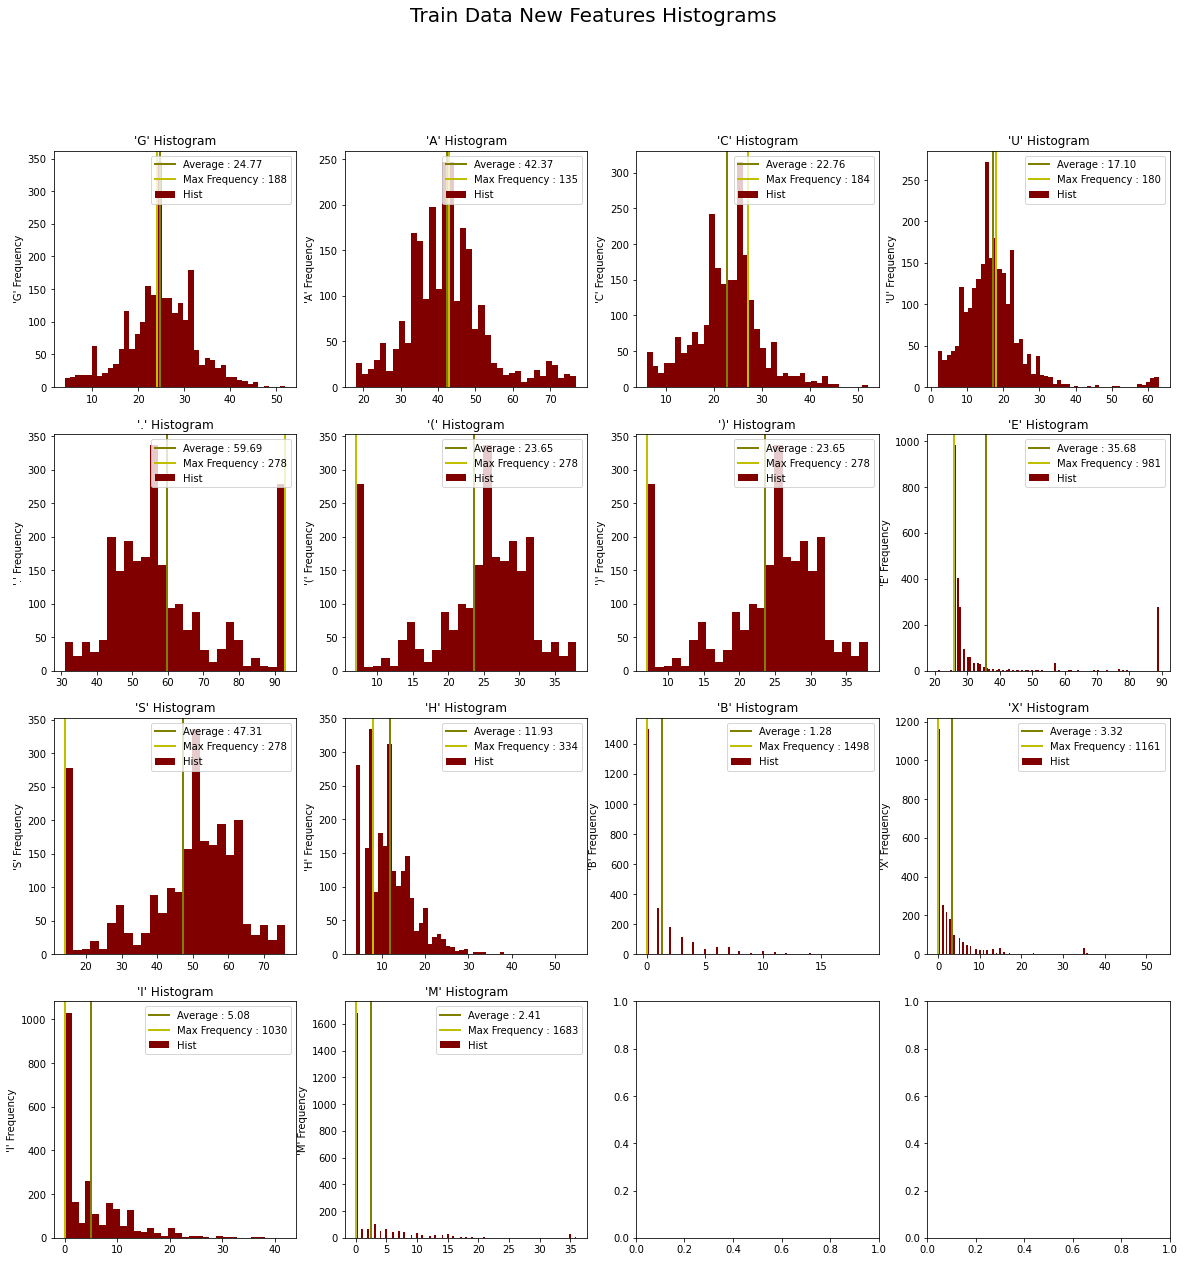

In [21]:
fig, _ax = plt.subplots(nrows = 4 , ncols = 4 , figsize = (20 , 20))
fig.suptitle("Train Data New Features Histograms", fontsize = 20,)

for i,_ax in enumerate(_ax.ravel()[:14]):
    mean_value = train[feature_columns[i]].mean()
    max_value_index , max_value = Counter(train[feature_columns[i]]).most_common(1)[0]
    
    _ax.hist(x=train[feature_columns[i]] , bins = 'auto' , color = '#800000', alpha = 1 , rwidth = 1)
    _ax.set(ylabel = f"'{feature_columns[i]}' Frequency", title= f"'{feature_columns[i]}' Histogram")
    _ax.axvline(x = mean_value , color='#808000' , label= 'Average',linewidth=2)
    _ax.axvline(x = max_value_index , color = 'y' , label = 'Max', linewidth = 2)
    _ax.legend([f"Average : {mean_value:0.2f}" , f"Max Frequency : {max_value}", "Hist"] , loc = "upper right")
    
plt.show()

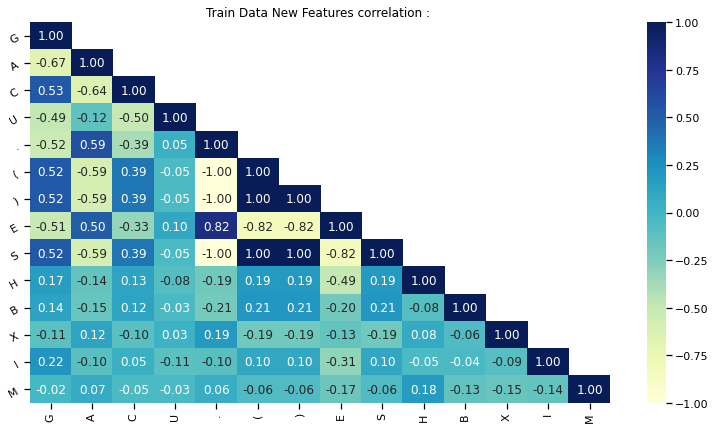

In [22]:
# Train Data New Features correlation

corr = train[feature_columns].corr()
sns.set_context("notebook" , font_scale = 1.0 , rc = {"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
plt.title("Train Data New Features correlation : ")

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr , mask = mask , annot = True , fmt = '.2f' , cmap = "YlGnBu")
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

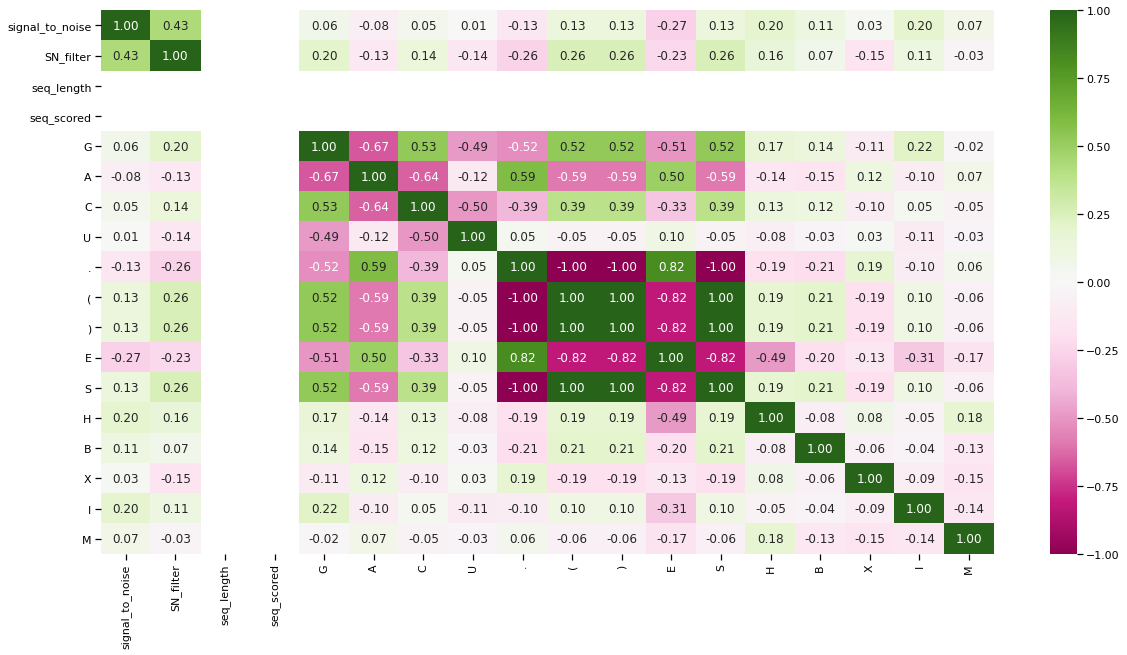

In [23]:
plt.figure(figsize = (20 , 10))
corr = train.corr()
sns.heatmap(corr , annot = True , fmt = '.2f' , cmap = "PiYG")

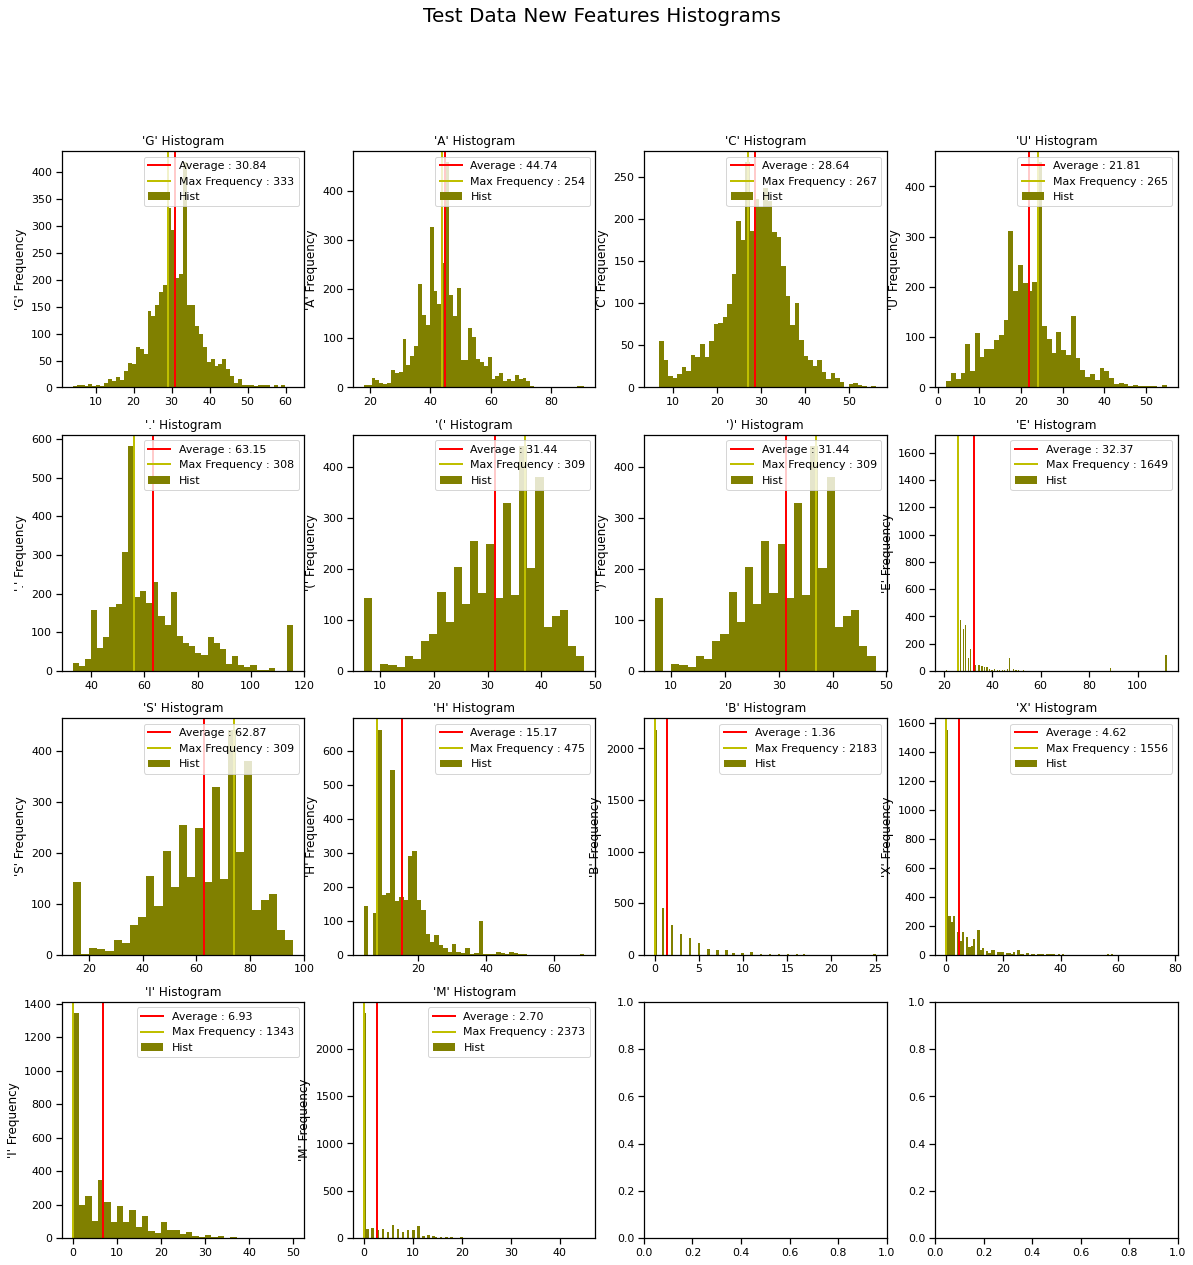

In [24]:
## Test-Data

feature_columns = ['G','A', 'C', 'U', '.', '(', ')', 'E', 'S', 'H', 'B', 'X','I','M']
test[feature_columns] = test.apply(character_count,axis=1,result_type="expand")
fig, _ax = plt.subplots(nrows=4,ncols=4,figsize=(20,20))
fig.suptitle("Test Data New Features Histograms", fontsize=20,)
for i,_ax in enumerate(_ax.ravel()[:14]):
    mean_value = test[feature_columns[i]].mean()
    max_value_index,max_value = Counter(test[feature_columns[i]]).most_common(1)[0]
    
    _ax.hist(x=test[feature_columns[i]],bins='auto', color='#808000', alpha=1, rwidth=1)
    _ax.set(ylabel=f"'{feature_columns[i]}' Frequency", title= f"'{feature_columns[i]}' Histogram")
    _ax.axvline(x=mean_value, color='r', label= 'Average',linewidth=2)
    _ax.axvline(x=max_value_index, color='y', label= 'Max',linewidth=2)
    _ax.legend([f"Average : {mean_value:0.2f}",f"Max Frequency : {max_value}", "Hist"], loc ="upper right")
plt.show()

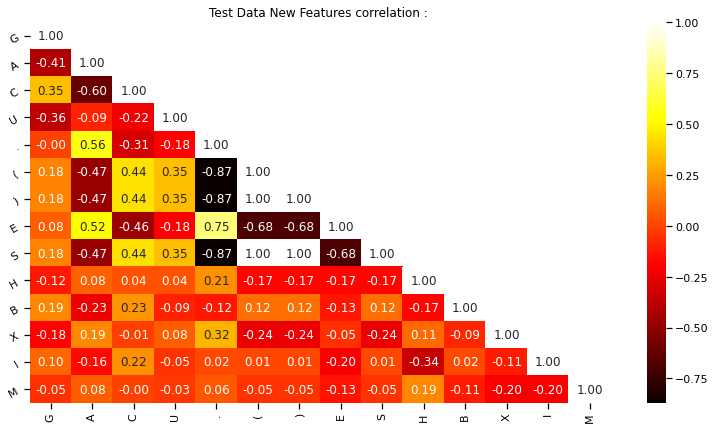

In [25]:
# Test Data New Features correlation
corr = test[feature_columns].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
plt.title("Test Data New Features correlation : ")

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f' , cmap = 'hot')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [26]:
avg_reactivity = np.array(list(map(np.array,train.reactivity))).mean(axis = 0)
avg_deg_50C = np.array(list(map(np.array,train.deg_50C))).mean(axis = 0)
avg_deg_pH10 = np.array(list(map(np.array,train.deg_pH10))).mean(axis = 0)
avg_deg_Mg_50C = np.array(list(map(np.array,train.deg_Mg_50C))).mean(axis = 0)
avg_deg_Mg_pH10 = np.array(list(map(np.array,train.deg_Mg_pH10))).mean(axis = 0)

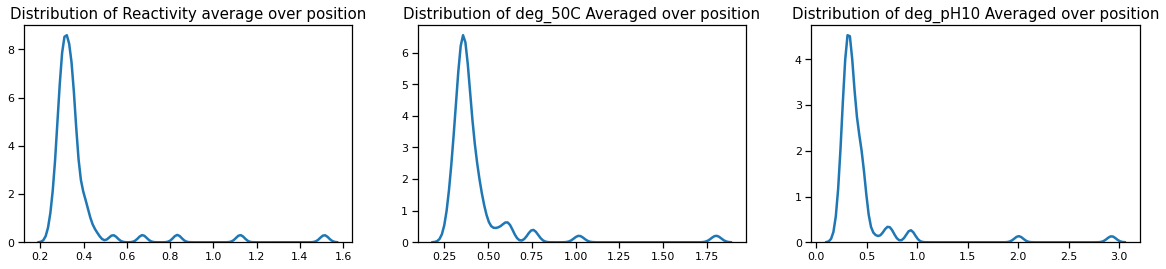

In [27]:
fig , ax = plt.subplots(1 , 3 , figsize = (20 , 4))

sns.kdeplot(avg_reactivity , ax = ax[0])
ax[0].set_title("Distribution of Reactivity average over position" , size = 15)

# Distribution of deg_50C Averaged over position
sns.kdeplot(avg_deg_50C , ax = ax[1])
ax[1].set_title('Distribution of deg_50C Averaged over position', size = 15)

# Distribution of deg_pH10 Averaged over position
sns.kdeplot(avg_deg_pH10 , ax = ax[2])
ax[2].set_title('Distribution of deg_pH10 Averaged over position' , size = 15)


plt.show()

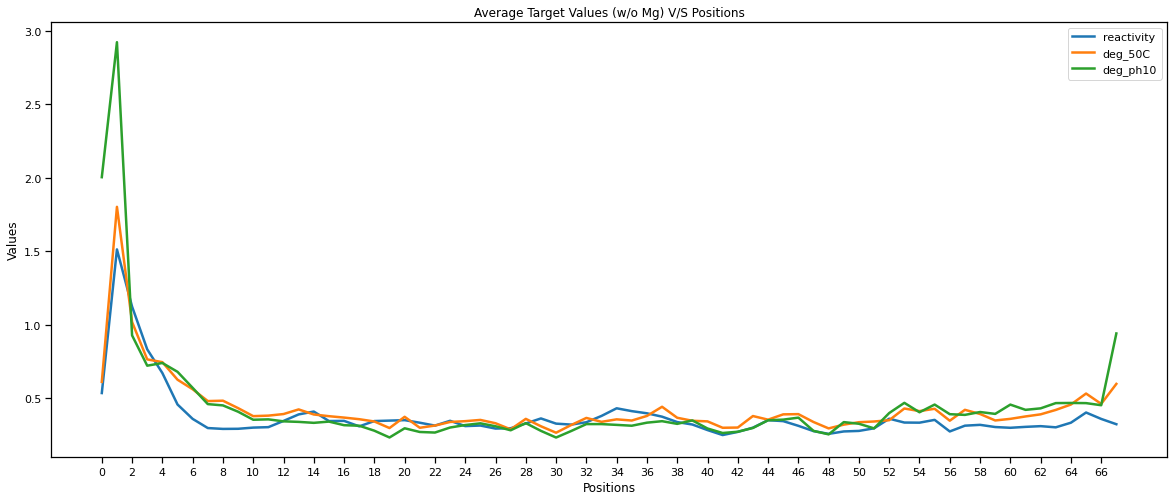

In [28]:
plt.figure(figsize = (20 , 8))

sns.lineplot(x = range(68) , y = avg_reactivity , label = 'reactivity')
sns.lineplot(x = range(68) , y = avg_deg_50C , label = 'deg_50C')
sns.lineplot(x = range(68) , y = avg_deg_pH10 , label = 'deg_ph10')

plt.xlabel('Positions')
plt.xticks(range(0 , 68 , 2))
plt.ylabel('Values')
plt.title('Average Target Values (w/o Mg) V/S Positions')

plt.show()

We can see high values of Degradation & Reactivity at the beginning of the sequence There is high degradation because of pH10 at the beginning but no such pattern for rest of the positions. We can see some correlation between deg_50C & deg_pH10

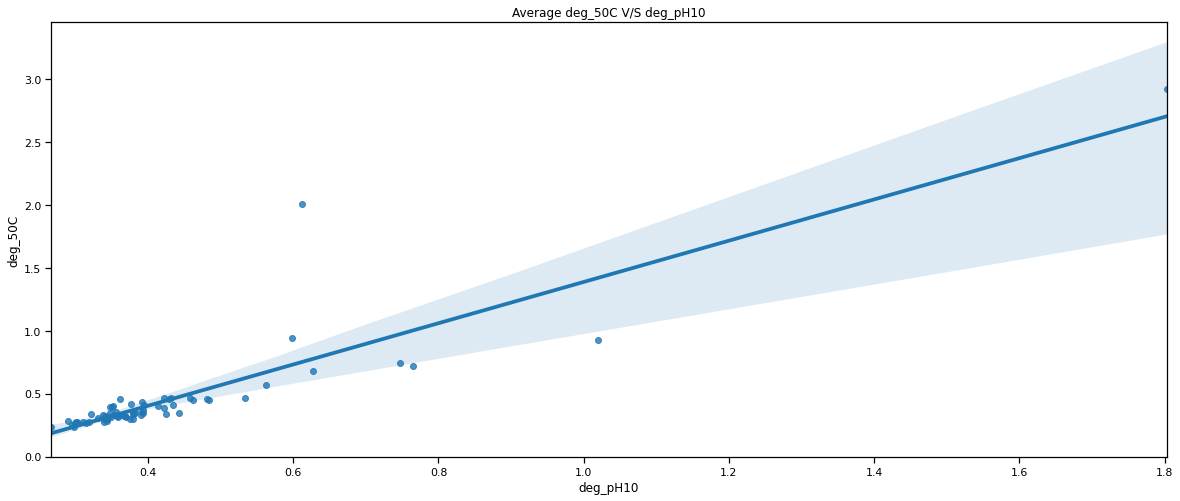

In [29]:
plt.figure(figsize = (20 , 8))
sns.regplot(x = avg_deg_50C , y = avg_deg_pH10)

plt.title('Average deg_50C V/S deg_pH10')
plt.ylabel('deg_50C')
plt.xlabel('deg_pH10')

plt.show()

In [30]:
print("Correlation Coeff between avg_deg_50C & avg_deg_pH10: ",np.corrcoef(avg_deg_50C,avg_deg_pH10)[0][1])

Correlation Coeff between avg_deg_50C & avg_deg_pH10:  0.8841301466799286


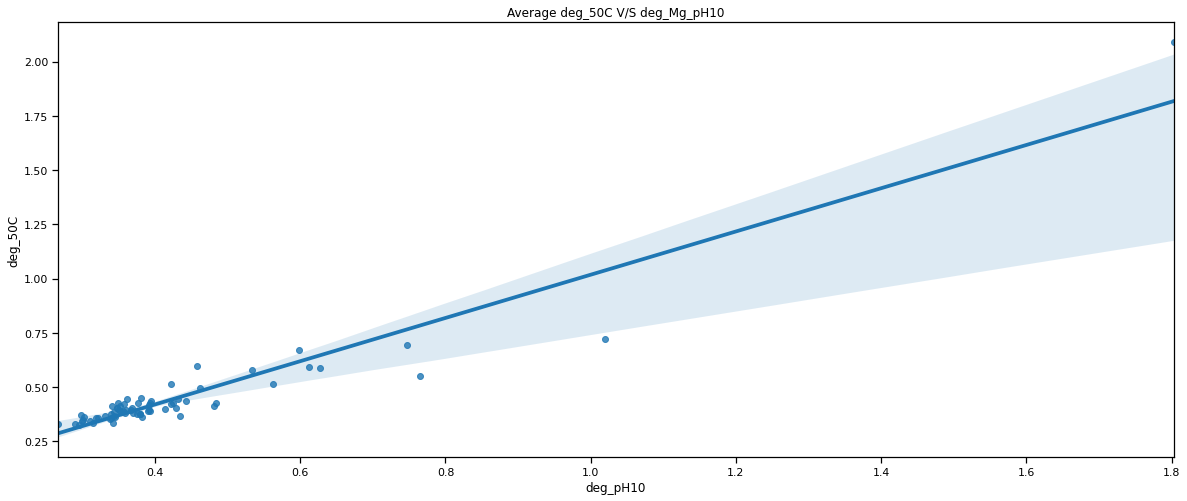

In [31]:
plt.figure(figsize = (20 , 8))
sns.regplot(x = avg_deg_50C , y = avg_deg_Mg_pH10)

plt.title('Average deg_50C V/S deg_Mg_pH10')
plt.ylabel('deg_50C')
plt.xlabel('deg_pH10')

plt.show()

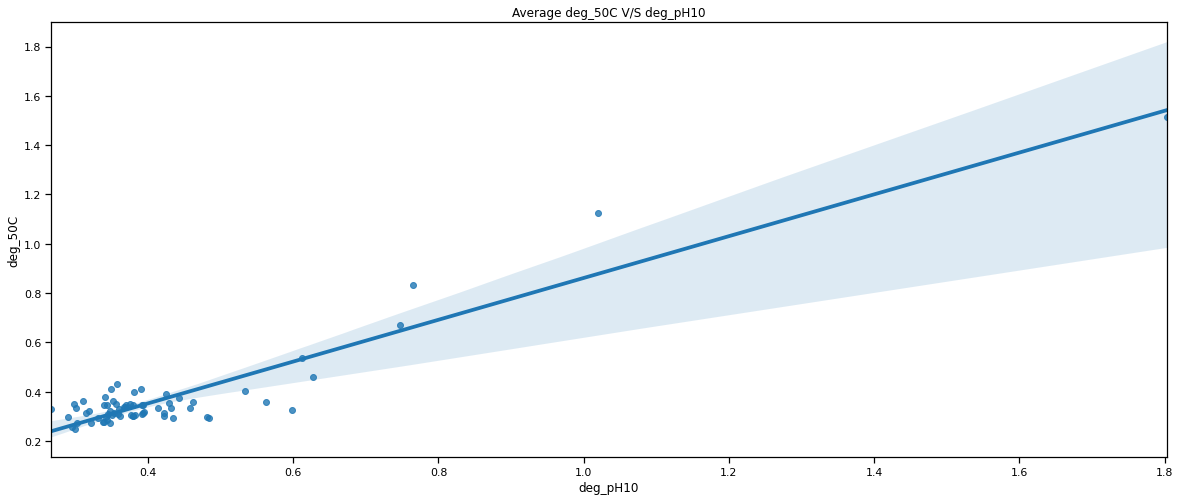

In [32]:
plt.figure(figsize = (20 , 8))
sns.regplot(x = avg_deg_50C , y = avg_reactivity)

plt.title('Average deg_50C V/S deg_pH10')
plt.ylabel('deg_50C')
plt.xlabel('deg_pH10')

plt.show()

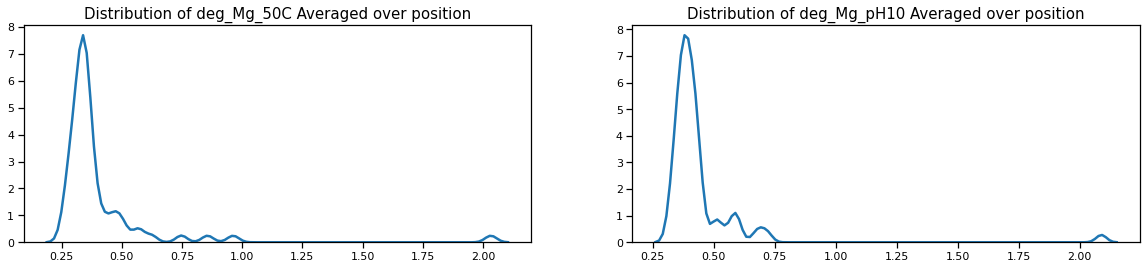

In [33]:
fig, ax = plt.subplots(1 , 2 , figsize = (20 , 4))

# Distribution of deg_50C Averaged over position
sns.kdeplot(avg_deg_Mg_50C , ax = ax[0])
ax[0].set_title('Distribution of deg_Mg_50C Averaged over position' , size = 15)


# Distribution of deg_pH10 Averaged over position
sns.kdeplot(avg_deg_Mg_pH10 , ax = ax[1])
ax[1].set_title('Distribution of deg_Mg_pH10 Averaged over position' , size = 15)

plt.show()

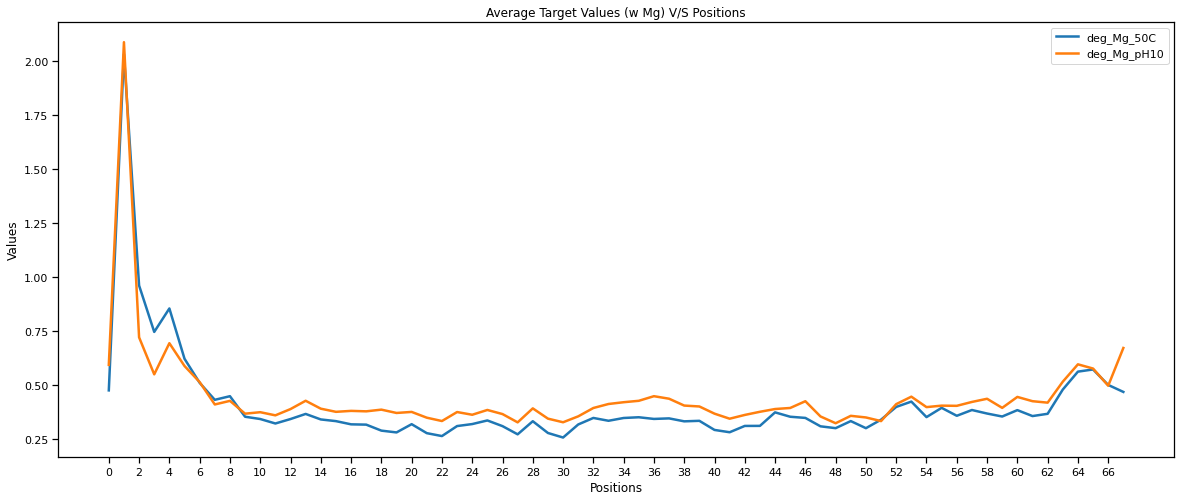

In [34]:
plt.figure(figsize = (20 , 8))

sns.lineplot(x = range(68) , y = avg_deg_Mg_50C , label = 'deg_Mg_50C')
sns.lineplot(x = range(68) , y = avg_deg_Mg_pH10 , label = 'deg_Mg_pH10')

plt.xlabel('Positions')
plt.xticks(range(0 , 68 , 2))
plt.ylabel('Values')
plt.title('Average Target Values (w Mg) V/S Positions')

plt.show()

In [35]:
print("Correlation Coeff between avg_deg_Mg_50C & avg_deg_Mg_pH10: ",np.corrcoef(avg_deg_Mg_50C,avg_deg_Mg_pH10)[0][1])

Correlation Coeff between avg_deg_Mg_50C & avg_deg_Mg_pH10:  0.9651712822435524


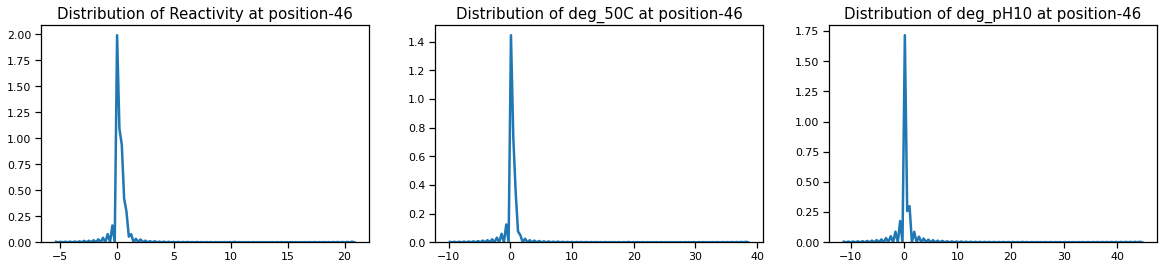

In [36]:
pos = np.random.choice(68)

fig, ax = plt.subplots(1,3,figsize=(20,4))

# Distribution of Reactivity at Random position
sns.kdeplot(np.array(list(map(np.array,train.reactivity)))[:,pos],ax=ax[0])
ax[0].set_title(f'Distribution of Reactivity at position-{pos}',size=15)

# Distribution of deg_50C at Random position
sns.kdeplot(np.array(list(map(np.array,train.deg_50C)))[:,pos],ax=ax[1])
ax[1].set_title(f'Distribution of deg_50C at position-{pos}',size=15)

# Distribution of deg_pH10 at Random position
sns.kdeplot(np.array(list(map(np.array,train.deg_pH10)))[:,pos],ax=ax[2])
ax[2].set_title(f'Distribution of deg_pH10 at position-{pos}',size=15)

plt.show()

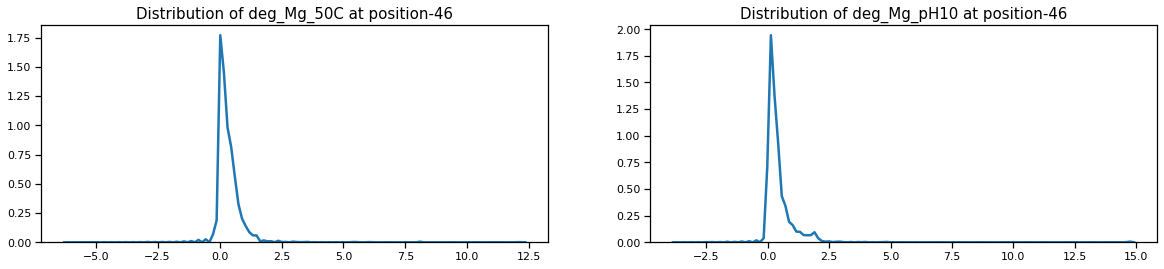

In [37]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

# Distribution of deg_50C at Random position
sns.kdeplot(np.array(list(map(np.array,train.deg_Mg_50C)))[:,pos],ax=ax[0])
ax[0].set_title(f'Distribution of deg_Mg_50C at position-{pos}',size=15)


# Distribution of deg_pH10 at Random position
sns.kdeplot(np.array(list(map(np.array,train.deg_Mg_pH10)))[:,pos],ax=ax[1])
ax[1].set_title(f'Distribution of deg_Mg_pH10 at position-{pos}',size=15)

plt.show()

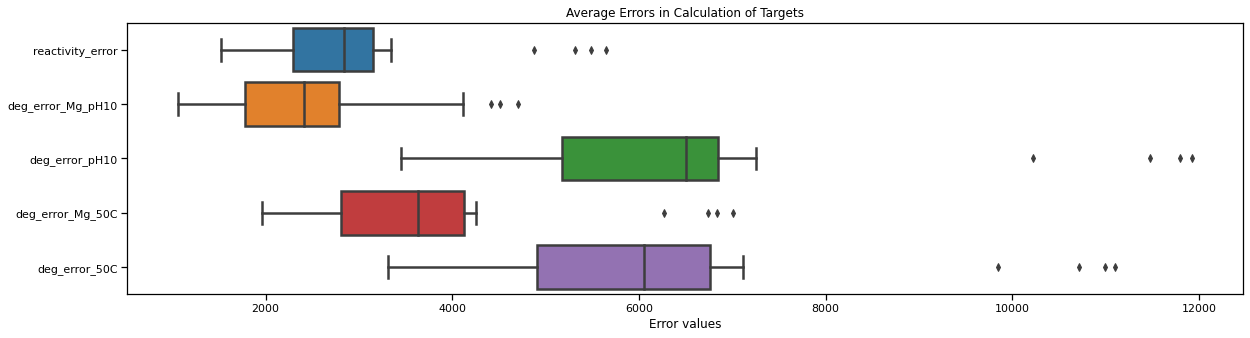

In [38]:
y = ['reactivity_error' , 'deg_error_Mg_pH10' , 'deg_error_pH10' , 'deg_error_Mg_50C' ,'deg_error_50C']
x = [np.array(list(map(np.array,train[col]))).mean(axis = 0) for col in y]

plt.figure(figsize = (20 , 5))

sns.boxplot(y = y , x = x)

plt.xlabel('Error values')
plt.title('Average Errors in Calculation of Targets')

plt.show()


Very high values of Errors in deg_error_pH10 & deg_error_50C but maybe we should not worry about these targets because evaluation is not based on these targets Maybe this could be a reason why our models will not be scored on these two targets

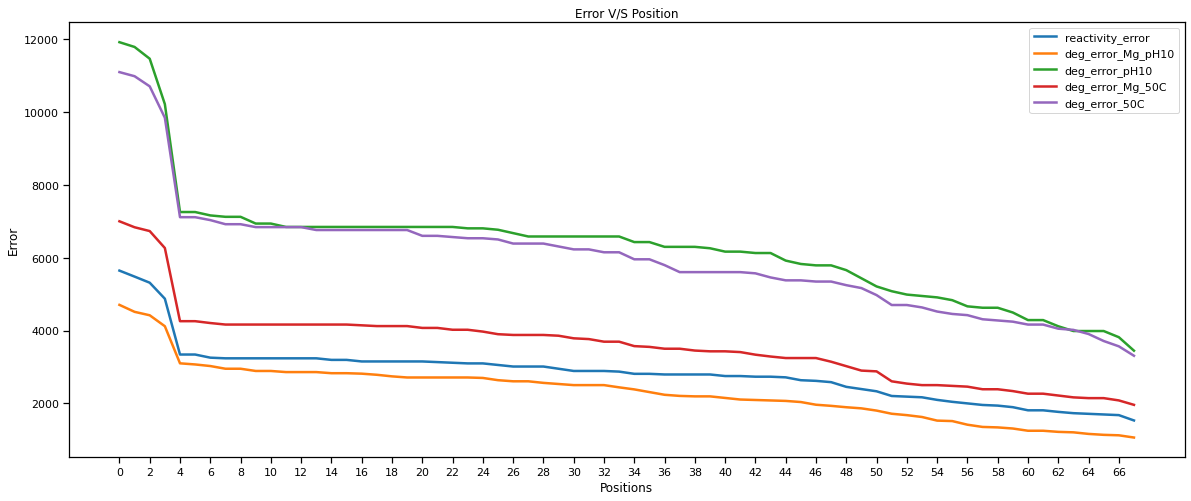

In [39]:
plt.figure(figsize = (20 , 8))

for i in range(len(y)):
    sns.lineplot(x = range(68) , y = x[i] , label = y[i])
    
plt.xlabel('Positions')
plt.xticks(range(0,68,2))
plt.ylabel('Error')
plt.title('Error V/S Position')

plt.show()


We can see an interesting pattern here. We have high values of errors between postions 0 and 4, but then it starts decreasing constantly as we go ahead Now let's analyse if all samples are contributing to these high values or there are only few smaples which are driving these values

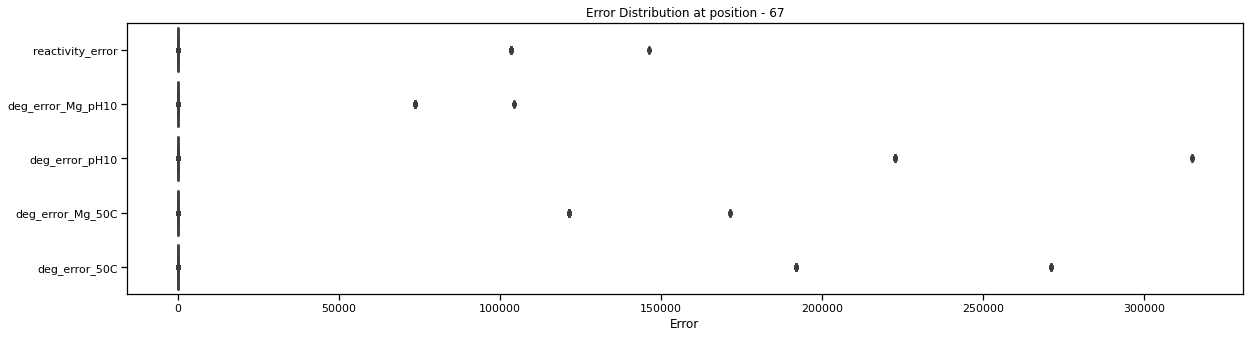

In [40]:
pos = np.random.choice(68)

y = ['reactivity_error','deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C','deg_error_50C']
x = [np.array(list(map(np.array , train[col])))[:,pos] for col in y]

plt.figure(figsize = (20 , 5))
plt.title(f'Error Distribution at position - {pos}')
plt.xlabel('Error')

sns.boxplot(y=y,x=x)

plt.show()

We can see there are few samples which are having high values of errors Now let's try to filter these samples We can try using SN_filter for this

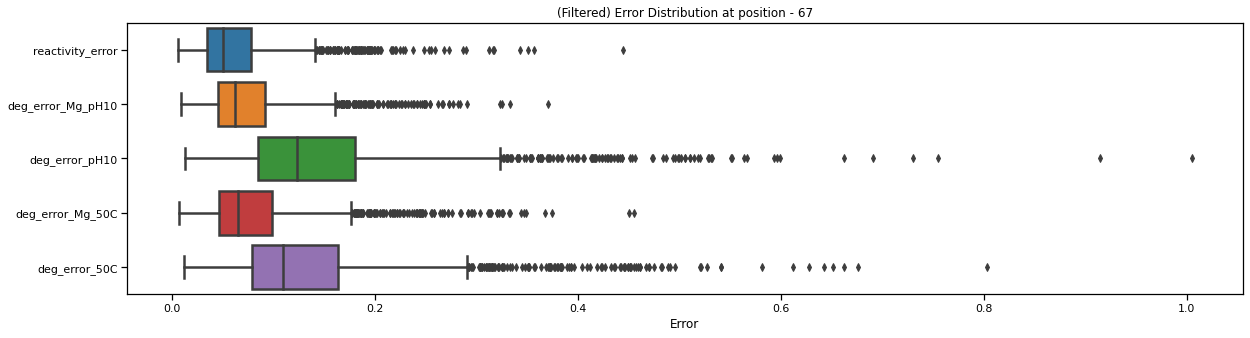

In [41]:
y = ['reactivity_error','deg_error_Mg_pH10', 'deg_error_pH10', 'deg_error_Mg_50C','deg_error_50C']
x = [np.array(list(map(np.array,train[train.SN_filter == 1][col])))[:,pos] for col in y]

plt.figure(figsize = (20 , 5))
plt.title(f'(Filtered) Error Distribution at position - {pos}')
plt.xlabel('Error')

sns.boxplot(y = y , x = x)

plt.show()

In [42]:
def plot_sample(sample):
    
    struct = sample['structure']
    seq = sample['sequence']
    bg = fgb.BulgeGraph.from_fasta_text(f'>rna1\n{struct}\n{seq}')[0]
    
    plt.figure(figsize=(20,8))
    fvm.plot_rna(bg)
    plt.title(f"RNA Structure (id: {sample.id})")
    plt.show()

In [43]:
sample = train.iloc[np.random.choice(train.shape[0])]
#plot_sample(sample)
print("Predicted Loop type: ",sample['predicted_loop_type'])

Predicted Loop type:  EEEEEEEEEESSSSISSSIISSHHHHHHHHSSIISSSIISSSSSSSSSBSSSSSHHHHSSSSSSSSSSSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE


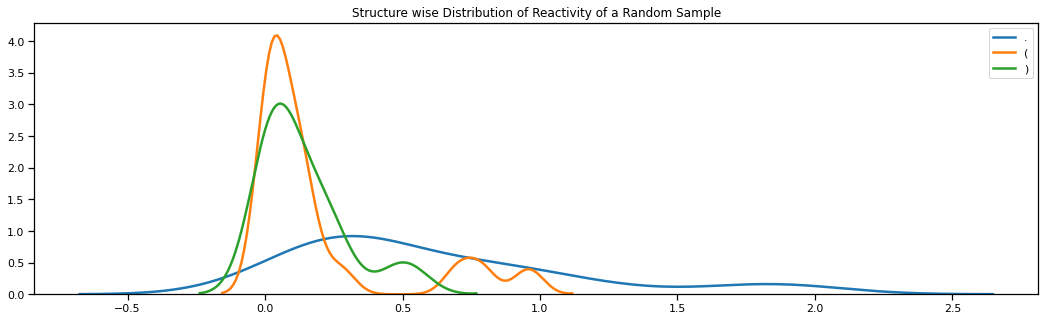

In [44]:
from collections import defaultdict

reactivity = defaultdict(lambda: [])
deg_Mg_50C = defaultdict(lambda: [])
deg_Mg_pH10 = defaultdict(lambda: [])

for i in range(len(sample['reactivity'])):
    reactivity[sample['structure'][i]].append(float(sample['reactivity'][i]))
    deg_Mg_50C[sample['structure'][i]].append(float(sample['deg_Mg_50C'][i]))
    deg_Mg_pH10[sample['structure'][i]].append(float(sample['deg_Mg_pH10'][i]))

plt.figure(figsize = (18 , 5))
for key in reactivity.keys():
    sns.kdeplot(data=reactivity[key],label=key)

plt.title('Structure wise Distribution of Reactivity of a Random Sample')
plt.show()

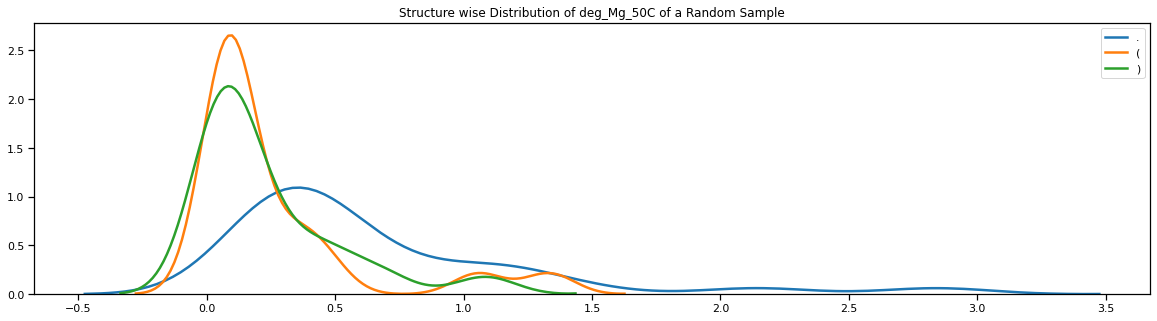

In [45]:
plt.figure(figsize = (20 , 5))
for key in reactivity.keys():
    sns.kdeplot(data = deg_Mg_50C[key] , label = key)

plt.title('Structure wise Distribution of deg_Mg_50C of a Random Sample')
plt.show()

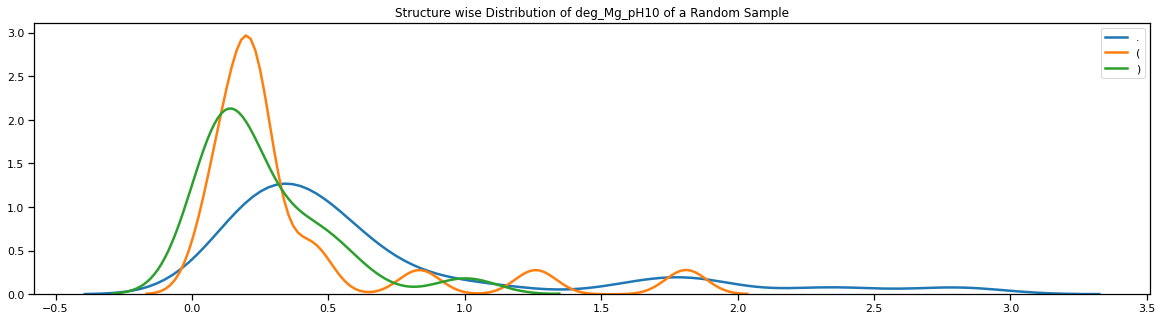

In [46]:

plt.figure(figsize = (20 , 5))
for key in reactivity.keys():
    sns.kdeplot(data = deg_Mg_pH10[key] , label = key)

plt.title('Structure wise Distribution of deg_Mg_pH10 of a Random Sample')
plt.show()

In [47]:
reactivityDict = defaultdict(lambda: [])

for index in range(train.shape[0]):
    
    sample = train.iloc[index]

    structure = sample['structure']
    sequence = sample['sequence']
    reactivity = sample['reactivity']

    q = []

    for i,s in enumerate(structure[:len(reactivity)]):
        if s=='.':
            reactivityDict[sequence[i]].append(reactivity[i])
        elif s=='(':
            q.append(i)
        elif s==')':
            j = q.pop(0)
            key = "-".join(sorted([sequence[i],sequence[j]]))
            reactivityDict[key].append(reactivity[i])
            reactivityDict[key].append(reactivity[j])

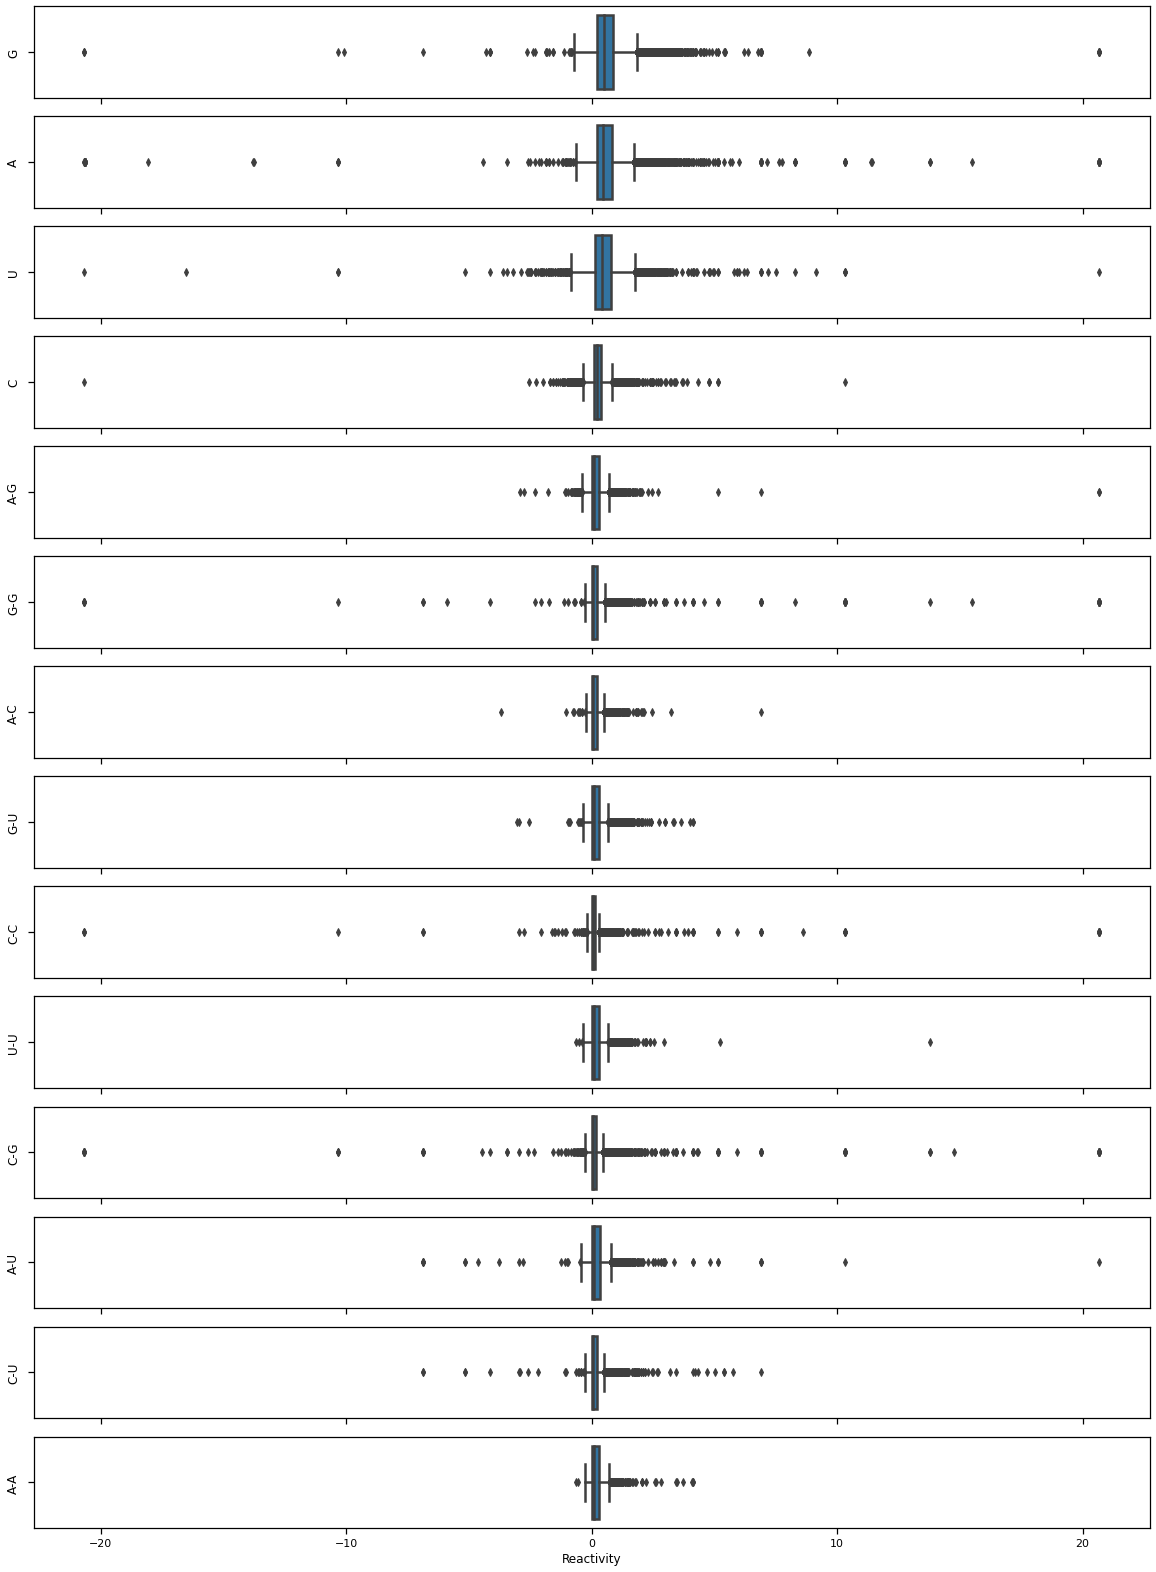

In [48]:
fig, ax = plt.subplots(len(reactivityDict.keys()) , 1 , figsize = (20 , 2 * len(reactivityDict.keys())) , sharex = True)

for i, key in enumerate(reactivityDict.keys()):
    sns.boxplot(x=reactivityDict[key],ax=ax[i])
    ax[i].set_ylabel(key)

plt.xlabel('Reactivity')
plt.show()

In [49]:
pri = test[test.seq_length == 130]
pub = test[test.seq_length == 107]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



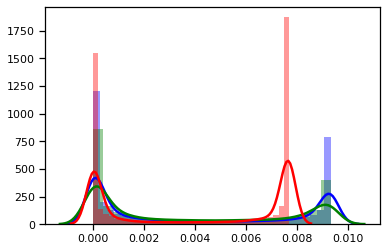

In [50]:
def read_bpps_mean(df):
    bpps_arr = []
    for mol_id in df.id.to_list():
        bpps_arr.append(np.load(f"../input/stanford-covid-vaccine/bpps/{mol_id}.npy").mean(axis=1))
    return bpps_arr

train['bpps_mean'] = read_bpps_mean(train)
pri['bpps_mean'] = read_bpps_mean(pri)
pub['bpps_mean'] = read_bpps_mean(pub)

sns.distplot(np.array(train['bpps_mean'].to_list()).reshape(-1) , color = "Blue")
sns.distplot(np.array(pub['bpps_mean'].to_list()).reshape(-1) , color = "Green")
sns.distplot(np.array(pri['bpps_mean'].to_list()).reshape(-1) , color = "Red")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



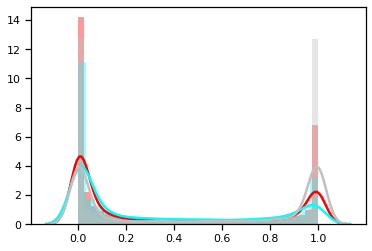

In [51]:

def read_bpps_max(df):
    bpps_arr = []
    for mol_id in df.id.to_list():
        bpps_arr.append(np.load(f"../input/stanford-covid-vaccine/bpps/{mol_id}.npy").max(axis=1))
    return bpps_arr

train['bpps_max'] = read_bpps_max(train)
pri['bpps_max'] = read_bpps_max(pri)
pub['bpps_max'] = read_bpps_max(pub)

sns.distplot(np.array(train['bpps_max'].to_list()).reshape(-1),color = "#FF0000")
sns.distplot(np.array(pub['bpps_max'].to_list()).reshape(-1),color = "#00FFFF")
sns.distplot(np.array(pri['bpps_max'].to_list()).reshape(-1),color = "#C0C0C0")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



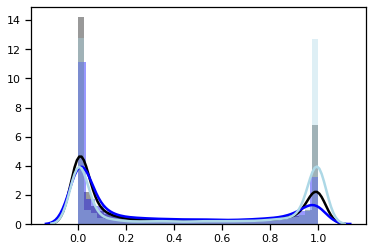

In [52]:
def read_bpps_max(df):
    bpps_arr = []
    for mol_id in df.id.to_list():
        bpps_arr.append(np.load(f"../input/stanford-covid-vaccine/bpps/{mol_id}.npy").max(axis=1))
    return bpps_arr

train['bpps_sum'] = read_bpps_max(train)
pri['bpps_sum'] = read_bpps_max(pri)
pub['bpps_sum'] = read_bpps_max(pub)

sns.distplot(np.array(train['bpps_max'].to_list()).reshape(-1),color = "#000000")
sns.distplot(np.array(pub['bpps_max'].to_list()).reshape(-1),color = "#0000FF")
sns.distplot(np.array(pri['bpps_max'].to_list()).reshape(-1),color = "#ADD8E6")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



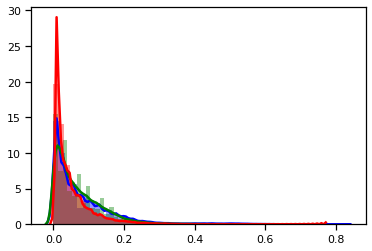

In [53]:
def read_bpps_nb(df):
    bpps_arr = []
    for mol_id in df.id.to_list():
        bpps = np.load(f"../input/stanford-covid-vaccine/bpps/{mol_id}.npy")
        bpps_nb = (bpps > 0).sum(axis=0) / bpps.shape[0]
        bpps_arr.append(bpps_nb)
    return bpps_arr 

train['bpps_nb'] = read_bpps_nb(train)
pri['bpps_nb'] = read_bpps_nb(pri)
pub['bpps_nb'] = read_bpps_nb(pub)

sns.distplot(np.array(train['bpps_nb'].to_list()).reshape(-1),color="Blue")
sns.distplot(np.array(pub['bpps_nb'].to_list()).reshape(-1),color="Green")
sns.distplot(np.array(pri['bpps_nb'].to_list()).reshape(-1),color="Red")

In [54]:
def mk_pair_map(structure, type = 'pm'):
    pm = np.full(len(structure), -1, dtype=int)
    pd = np.full(len(structure), -1, dtype=int)
    queue = []
    
    for i, s in enumerate(structure):
        if s == "(":
            queue.append(i)
        elif s == ")":
            j = queue.pop()
            pm[i] = j
            pm[j] = i
            pd[i] = i-j
            pd[j] = i-j
            
    if type == 'pm':
        return pm
    elif type == 'pd':
        return pd

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



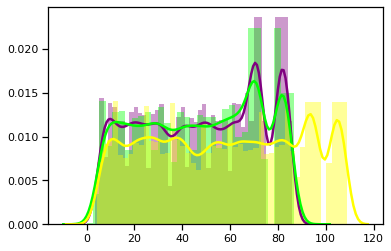

In [55]:
train['pair_map'] = train.structure.apply(mk_pair_map, type='pm')
pub['pair_map'] = pub.structure.apply(mk_pair_map, type='pm')
pri['pair_map'] = pri.structure.apply(mk_pair_map, type='pm')

train_list = np.array(train['pair_map'].to_list()).reshape(-1)
pub_list = np.array(pub['pair_map'].to_list()).reshape(-1)
pri_list = np.array(pri['pair_map'].to_list()).reshape(-1)

sns.distplot(train_list[~train_list<0],color="#800080")
sns.distplot(pub_list[~pub_list<0],color="#00FF00")
sns.distplot(pri_list[~pri_list<0],color="#FFFF00")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



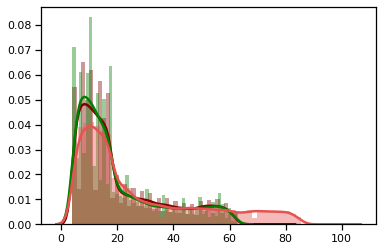

In [56]:

train['pair_dist'] = train.structure.apply(mk_pair_map, type='pd')
pub['pair_dist'] = pub.structure.apply(mk_pair_map, type='pd')
pri['pair_dist'] = pri.structure.apply(mk_pair_map, type='pd')

train_list = np.array(train['pair_dist'].to_list()).reshape(-1)
pub_list = np.array(pub['pair_dist'].to_list()).reshape(-1)
pri_list = np.array(pri['pair_dist'].to_list()).reshape(-1)

sns.distplot(train_list[~train_list<0],color="#800000")
sns.distplot(pub_list[~pub_list<0],color="#008000")
sns.distplot(pri_list[~pri_list<0],color="#E55451")

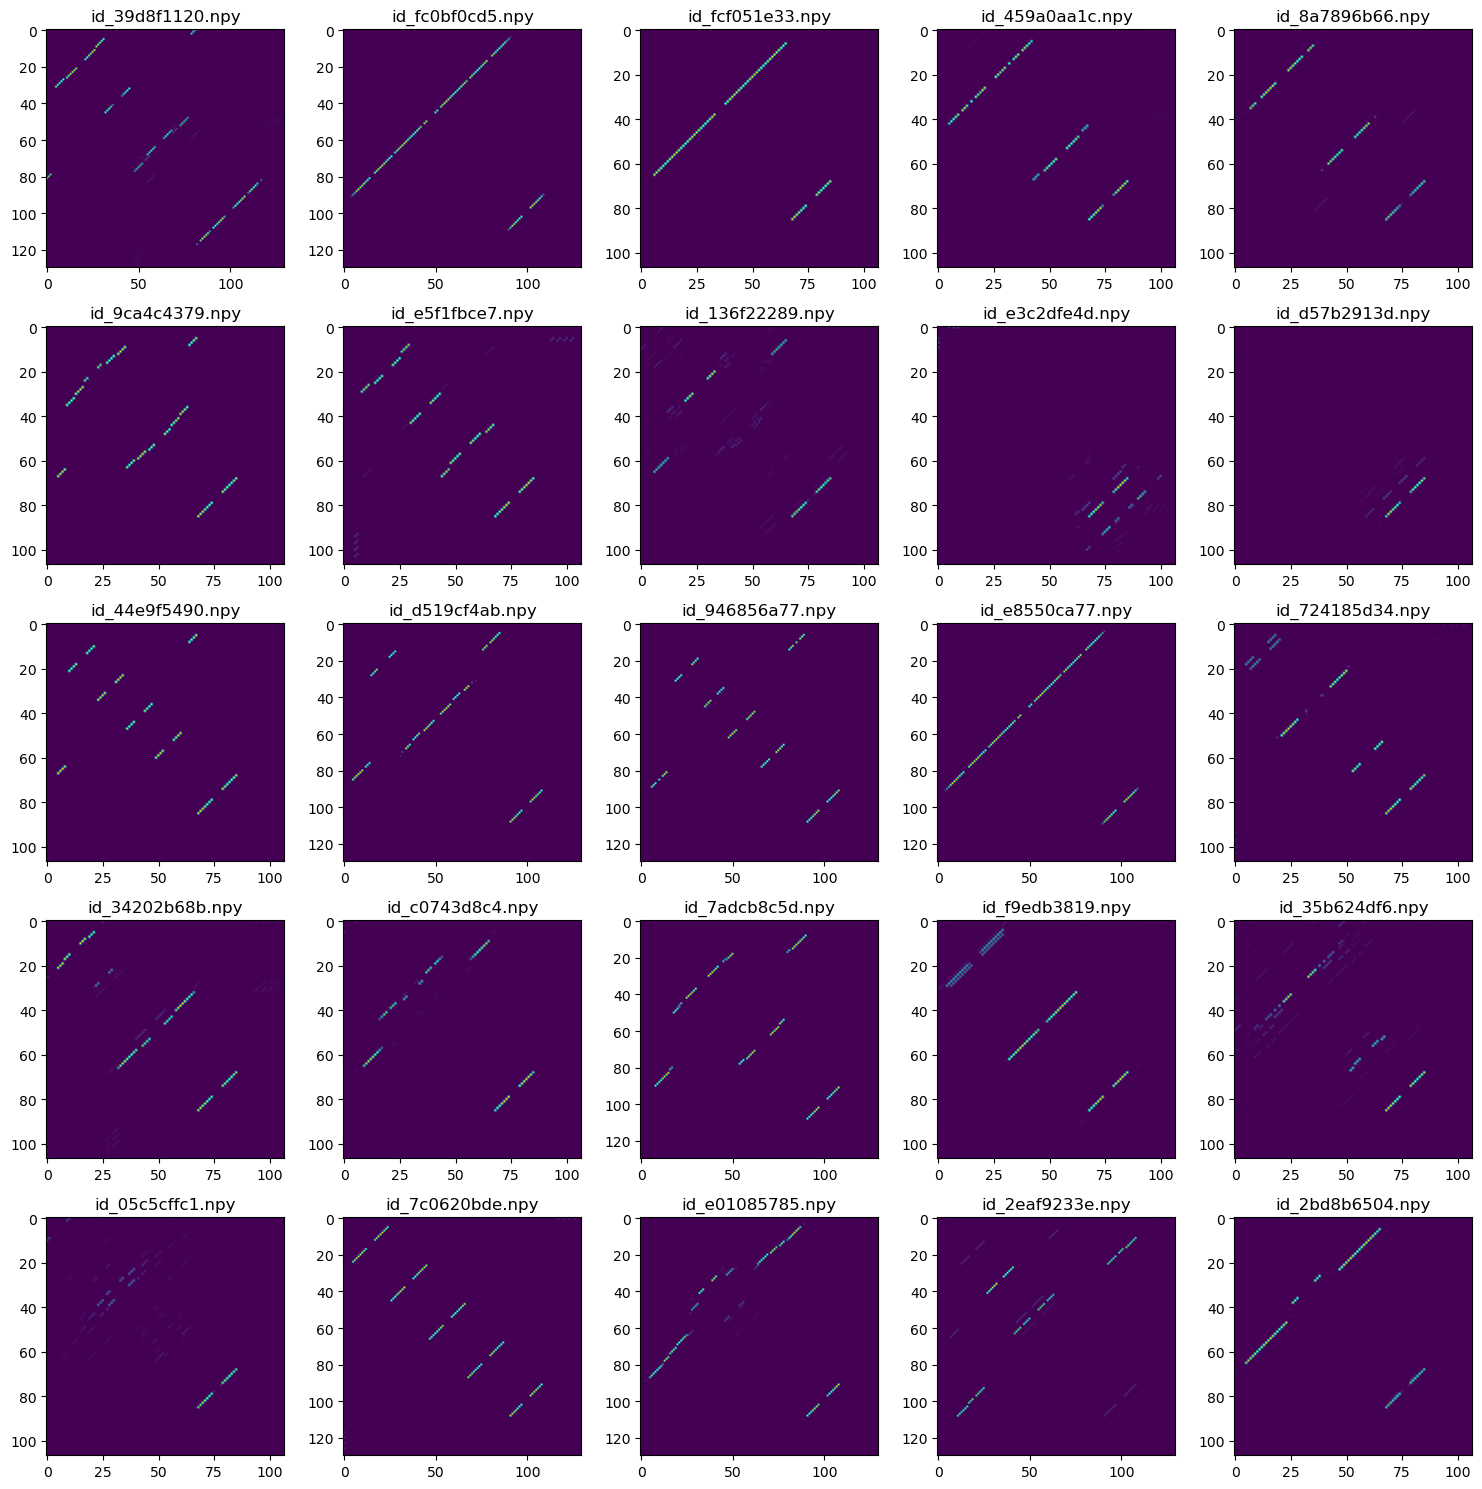

In [57]:
bpps_files = os.listdir('../input/stanford-covid-vaccine/bpps/')
plt.style.use('default')
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
axs = axs.flatten()
for i, f in enumerate(bpps_files):
    if i == 25:
        break
    example_bpps = np.load(f'../input/stanford-covid-vaccine/bpps/{f}')
    axs[i].imshow(example_bpps)
    axs[i].set_title(f)
plt.tight_layout()
plt.show()

In [58]:
def get_ngrams_counters(sequences, n=2):
    output = Counter()
    for sequence in sequences:
        output += Counter([sequence[i:i+n] for i in range(len(sequence)-1)])
        
    return output

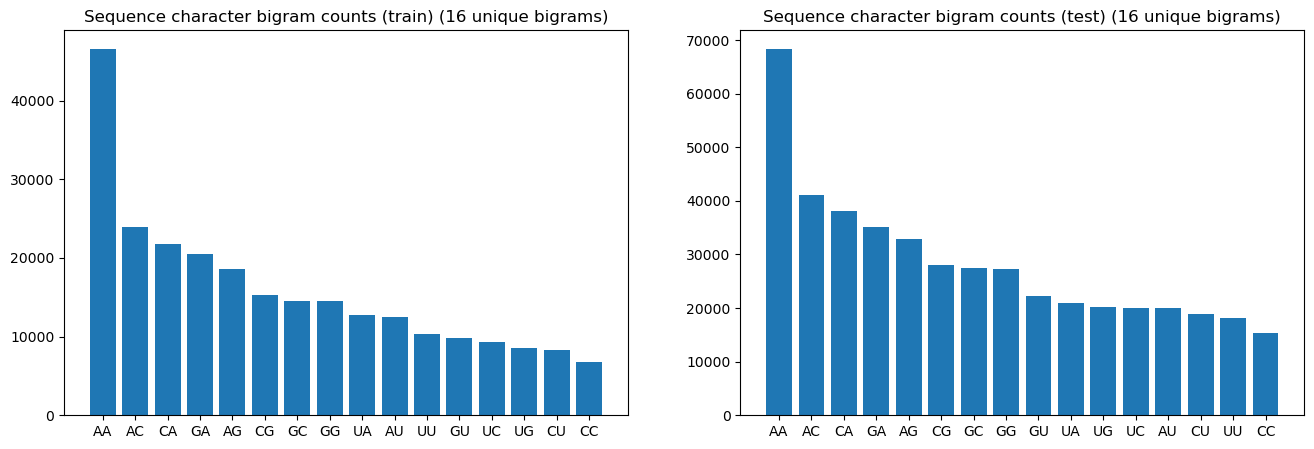

In [59]:
train_ngram_sequence = get_ngrams_counters(train.sequence)
test_ngram_sequence = get_ngrams_counters(test.sequence)

# Used to sort by frequency.
train_ngram_sequence = dict(train_ngram_sequence.most_common(10000))
test_ngram_sequence = dict(test_ngram_sequence.most_common(10000))

plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.title(f'Sequence character bigram counts (train) ({len(train_ngram_sequence)} unique bigrams)')
plt.bar(dict(train_ngram_sequence).keys(), dict(train_ngram_sequence).values())

plt.subplot(1, 2, 2)
plt.title(f'Sequence character bigram counts (test) ({len(test_ngram_sequence)} unique bigrams)')
plt.bar(dict(test_ngram_sequence).keys(), dict(test_ngram_sequence).values())

plt.show()

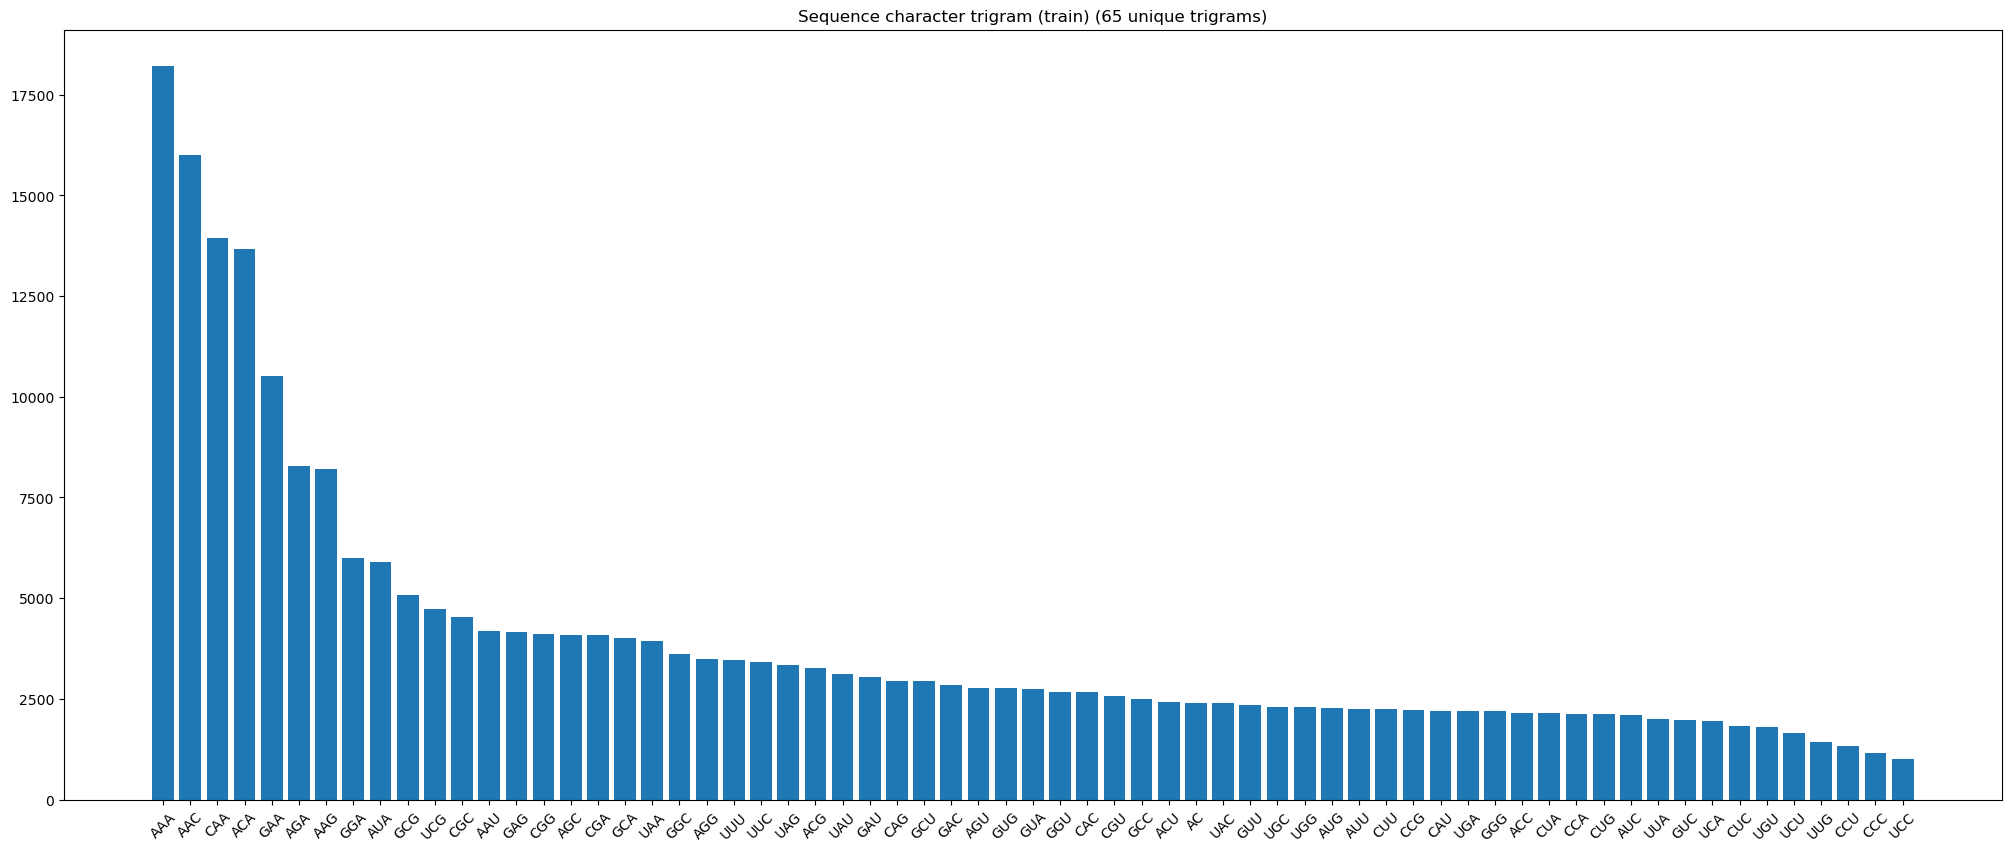

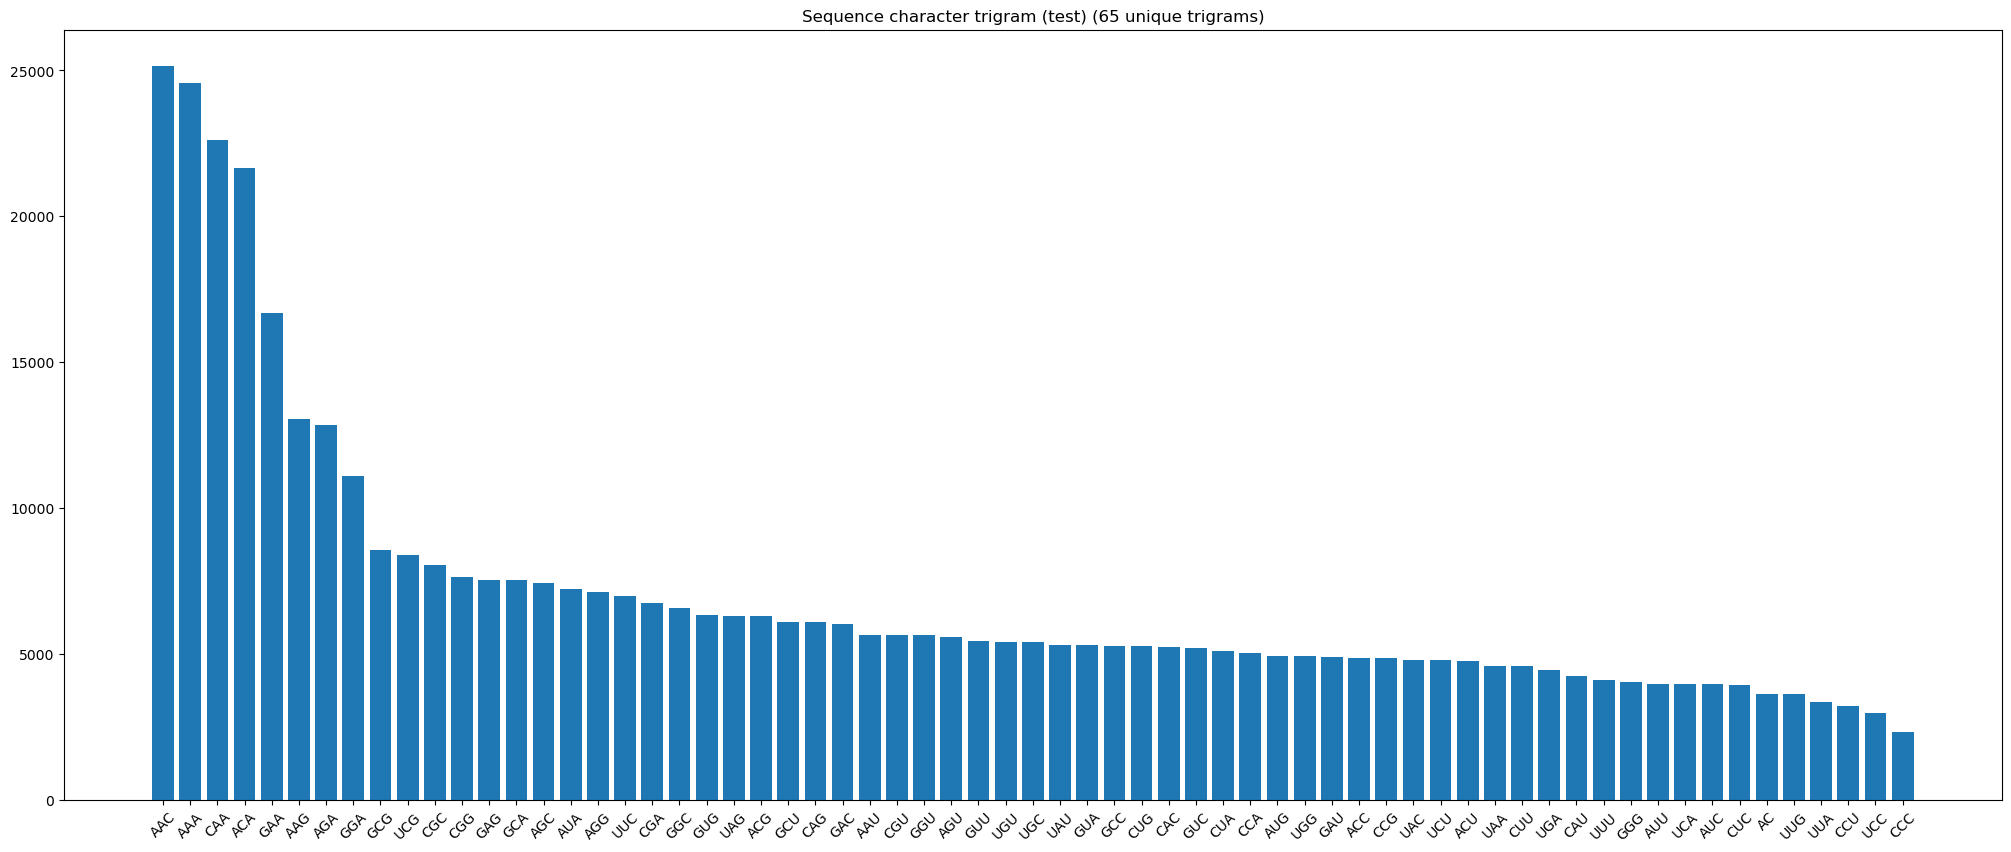

In [60]:
train_ngram_sequence = get_ngrams_counters(train.sequence, 3)
test_ngram_sequence = get_ngrams_counters(test.sequence, 3)

# Used to sort by frequency.
train_ngram_sequence = dict(train_ngram_sequence.most_common(10000))
test_ngram_sequence = dict(test_ngram_sequence.most_common(10000))

plt.figure(figsize=(25, 10))
plt.title(f'Sequence character trigram (train) ({len(train_ngram_sequence)} unique trigrams)')
plt.bar(dict(train_ngram_sequence).keys(), dict(train_ngram_sequence).values())
plt.xticks(rotation=45)

plt.figure(figsize=(25, 10))
plt.title(f'Sequence character trigram (test) ({len(test_ngram_sequence)} unique trigrams)')
plt.bar(dict(test_ngram_sequence).keys(), dict(test_ngram_sequence).values())
plt.xticks(rotation=45)

plt.show()

In [61]:
# This function performs some basic statististical analysis on the various labels.

def do_analysis(df, column_name):
    all_vals = [y for x in df[column_name] for y in x]
    print(f"Analysis across all samples for {column_name}")
    print(f'Mean: {np.mean(all_vals)}')
    print(f'Max: {np.max(all_vals)}')
    print(f'Min: {np.min(all_vals)}')
#     print(f'Mode: {mode(all_vals).mode[0]}')
    print(f'STD: {np.std(all_vals)}')
    print()
    
    plt.hist(all_vals)
    plt.title(f'Histogram for {column_name} across all samples')
    plt.show()
    
    print("Statistics aggregated per sample")
    fig, axes = plt.subplots(1, 4, figsize=(15, 5), squeeze=False)

    df[column_name].apply(
        lambda x: np.mean(x)).plot(
            kind='hist',
            bins=50, ax=axes[0,0],
            title=f'Mean dist {column_name}')

    df[column_name].apply(
        lambda x: np.max(x)).plot(
            kind='hist',
            bins=50, ax=axes[0,1],
            title=f'Max dist {column_name}')

    df[column_name].apply(
        lambda x: np.min(x)).plot(
            kind='hist',
            bins=50, ax=axes[0,2],
            title=f'Min dist {column_name}')
    df[column_name].apply(
        lambda x: np.std(x)).plot(
            kind='hist',
            bins=50, ax=axes[0,3],
            title=f'Std {column_name}')
    plt.show()

Analysis across all samples for reactivity
Mean: 0.37492229473039224
Max: 20.6675
Min: -20.6648
STD: 0.7256501399729157



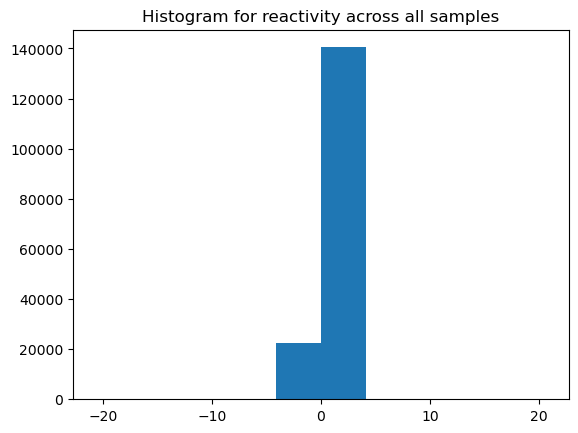

Statistics aggregated per sample


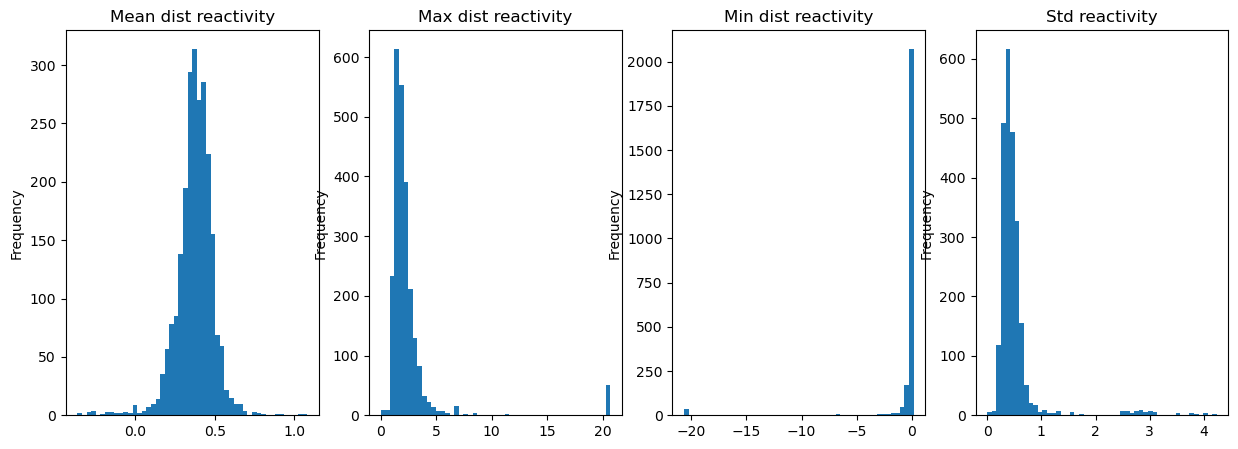

In [62]:
do_analysis(train, 'reactivity')

Analysis across all samples for deg_Mg_pH10
Mean: 0.4463034534313726
Max: 14.7401
Min: -14.7405
STD: 0.7041702875134325



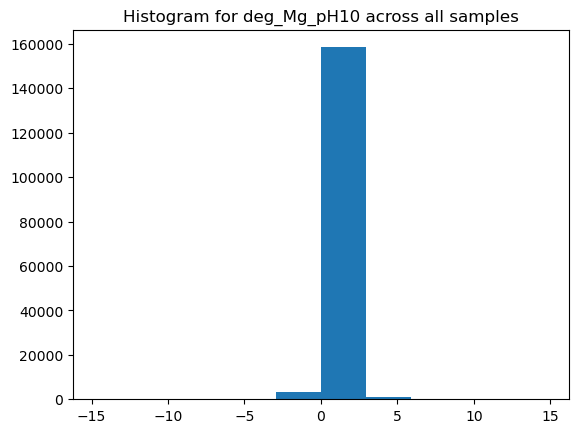

Statistics aggregated per sample


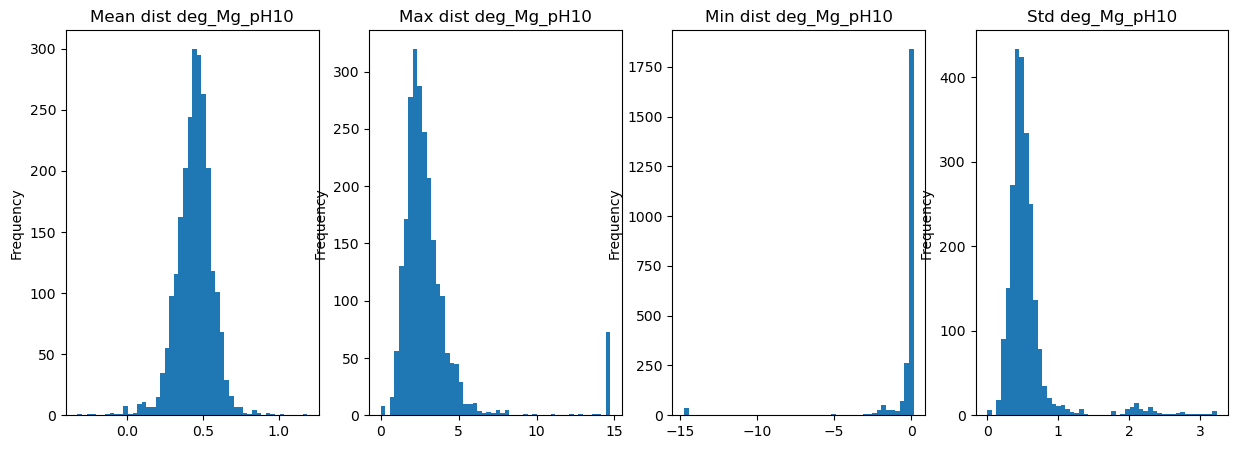

In [63]:
do_analysis(train, 'deg_Mg_pH10')

We can do same analysis for each feauture same way.

Hope You like my analysis of Data. By using this feautures we can apply models on top of it and get desired results